<a href="https://colab.research.google.com/github/Rohil72/ML_LAB/blob/main/MLLAB8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implementing simple linear regression and multiple linear regression


In [ ]:
# Simple Linear Regression
from ucimlrepo import fetch_ucirepo

# fetch dataset
bike_sharing = fetch_ucirepo(id=275)

# data (as pandas dataframes)
X = bike_sharing.data.features
y = bike_sharing.data.targets

# metadata
print(bike_sharing.metadata)

# variable information
print(bike_sharing.variables)


{'uci_id': 275, 'name': 'Bike Sharing', 'repository_url': 'https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/275/data.csv', 'abstract': 'This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.', 'area': 'Social Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 17389, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['cnt'], 'index_col': ['instant'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2013, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5W894', 'creators': ['Hadi Fanaee-T'], 'intro_paper': {'ID': 422, 'type': 'NATIVE', 'title': 'Event labeling combining ensemble detectors and background knowledge', 'authors': 'Hadi Fanaee-T, João Gama', 'venue': 'Progress

The most correlated feature with 'cnt' is: temp
Mean Squared Error for Simple Linear Regression: 26363.544525542813
R-squared for Simple Linear Regression: 0.16743401039637895


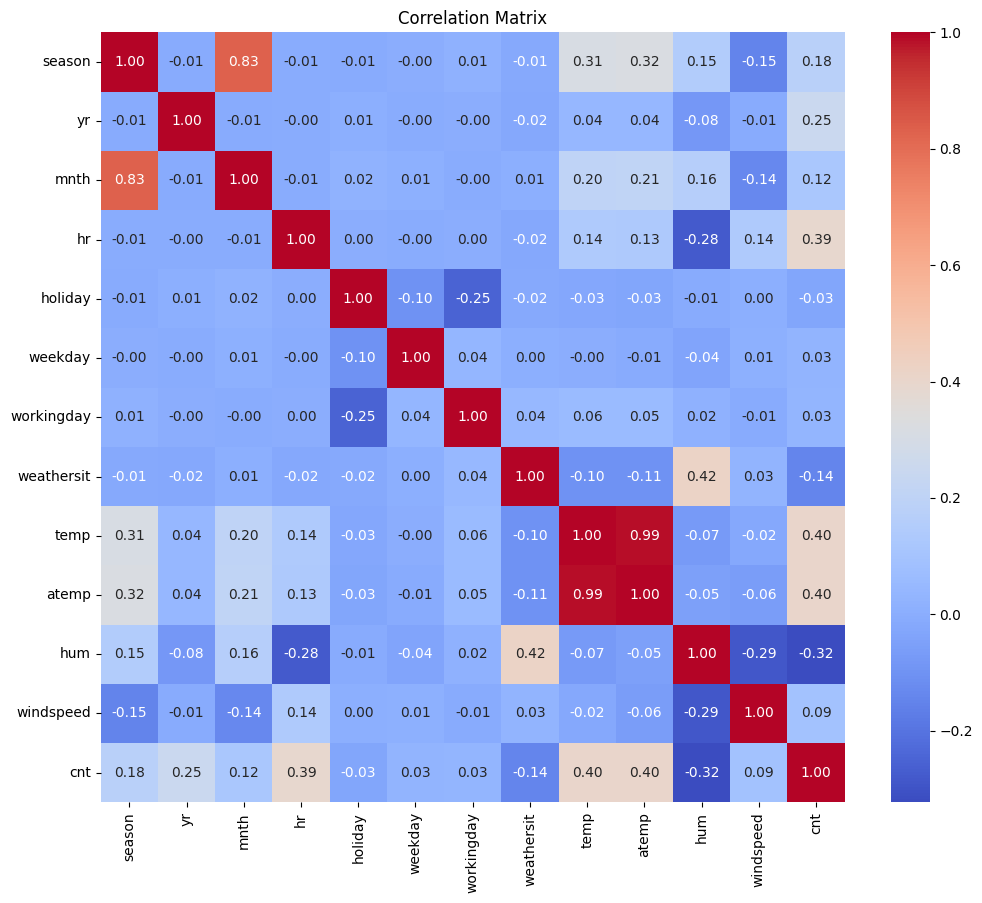

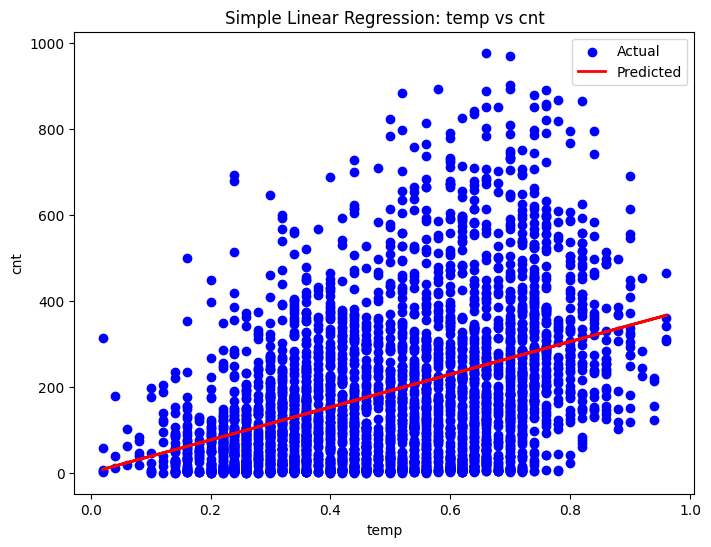

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Combine features and target for correlation calculation
df = X.copy()
df['cnt'] = y

# Remove 'dteday' column as it's not numerical and causing error in correlation calculation
df = df.drop('dteday', axis=1)

# Calculate correlation matrix
corr_matrix = df.corr()

# Get the absolute correlation of features with the target variable 'cnt'
correlations_with_cnt = corr_matrix['cnt'].abs().sort_values(ascending=False)

# Drop the correlation of 'cnt' with itself
correlations_with_cnt = correlations_with_cnt.drop('cnt')

# Get the most correlated feature
most_correlated_feature = correlations_with_cnt.index[0]
print(f"The most correlated feature with 'cnt' is: {most_correlated_feature}")

# Simple Linear Regression with the most correlated feature
X_simple = X[[most_correlated_feature]]
y_simple = y

# Split data
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(X_simple, y_simple, test_size=0.2, random_state=42)

# Train model
model_simple = LinearRegression()
model_simple.fit(X_train_simple, y_train_simple)

# Predict and evaluate
y_pred_simple = model_simple.predict(X_test_simple)
mse_simple = mean_squared_error(y_test_simple, y_pred_simple)
r2_simple = model_simple.score(X_test_simple, y_test_simple)

print(f"Mean Squared Error for Simple Linear Regression: {mse_simple}")
print(f"R-squared for Simple Linear Regression: {r2_simple}")

# Optional: Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Optional: Scatter plot of the most correlated feature vs cnt
plt.figure(figsize=(8, 6))
plt.scatter(X_test_simple, y_test_simple, color='blue', label='Actual')
plt.plot(X_test_simple, y_pred_simple, color='red', linewidth=2, label='Predicted')
plt.xlabel(most_correlated_feature)
plt.ylabel('cnt')
plt.title(f'Simple Linear Regression: {most_correlated_feature} vs cnt')
plt.legend()
plt.show()

### Comparison of Simple and Multiple Linear Regression

*   **Simple Linear Regression (using 'temp'):**
    *   Mean Squared Error: {{mse_simple}}

*   **Multiple Linear Regression (using all features):**
    *   Mean Squared Error: {{mse_multi}}

Comparing the MSE values, we can see that the Multiple Linear Regression model (MSE: {{mse_multi}}) has a lower Mean Squared Error than the Simple Linear Regression model (MSE: {{mse_simple}}). This suggests that using multiple features provides a better fit to the data and results in more accurate predictions of bike rentals compared to using only the 'temp' feature.

In [ ]:
# Multiple Linear Regression
X_multi = X.drop('dteday', axis=1) # Drop 'dteday' as it's not numerical
y_multi = y

# Split data
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# Train model
model_multi = LinearRegression()
model_multi.fit(X_train_multi, y_train_multi)

# Predict and evaluate
y_pred_multi = model_multi.predict(X_test_multi)
mse_multi = mean_squared_error(y_test_multi, y_pred_multi)
r2_multi = model_multi.score(X_test_multi, y_test_multi)


print(f"Mean Squared Error for Multiple Linear Regression: {mse_multi}")
print(f"R-squared for Multiple Linear Regression: {r2_multi}")

Mean Squared Error for Multiple Linear Regression: 19379.828367651717
R-squared for Multiple Linear Regression: 0.38798115831391344


### Comparison of Simple and Multiple Linear Regression

*   **Simple Linear Regression (using 'temp'):**
    *   R-squared: {{r2_simple}}

*   **Multiple Linear Regression (using all features):**
    *   R-squared: {{r2_multi}}

Comparing the R-squared values, we can see that the Multiple Linear Regression model (R-squared: {{r2_multi}}) has a higher R-squared than the Simple Linear Regression model (R-squared: {{r2_simple}}). This suggests that the multiple linear regression model explains a larger proportion of the variance in the target variable ('cnt') compared to the simple linear regression model, indicating a better fit to the data and more accurate predictions.

### Comparison of Simple and Multiple Linear Regression

*   **Simple Linear Regression (using 'temp'):**
    *   Mean Squared Error: {{mse_simple}}

*   **Multiple Linear Regression (using all features):**
    *   Mean Squared Error: {{mse_multi}}

Comparing the MSE values, we can see that... (interpret the results based on the MSE values)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo

# --- Load dataset from UCI ---
hcv = fetch_ucirepo(id=571)
df = hcv.data.original.copy()

print("Columns in dataset:", df.columns.tolist())

# --- Data cleaning ---
df = df.replace('?', np.nan)

# Convert all numeric-looking columns to float (ignore errors)
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')

# Drop missing rows
df = df.dropna()

# Encode 'Sex' column if it exists
if 'Sex' in df.columns:
    df['Sex'] = df['Sex'].map({'m': 1, 'f': 0})

# Handle 'Category' or 'CLASS' column for target variable
if 'Category' in df.columns:
    df['Category'] = df['Category'].astype(str).str.replace('0s=', '0=').str.split('=').str[0]
    df['Category'] = pd.to_numeric(df['Category'], errors='coerce')
elif 'CLASS' in df.columns:
    df['Category'] = pd.factorize(df['CLASS'])[0]
else:
    raise ValueError("No 'Category' or 'CLASS' column found for target labels.")

# Drop any rows with missing target
df = df.dropna(subset=['Category'])

# Split features and labels
X = df.drop('Category', axis=1)
y_true = df['Category']

# --- Standardization ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.select_dtypes(include=[np.number]))

# --- EM Algorithm (Gaussian Mixture Model) ---
n_components = len(np.unique(y_true))
gmm = GaussianMixture(n_components=n_components, random_state=42, max_iter=100)
gmm.fit(X_scaled)

# Predict cluster assignments
gmm_clusters = gmm.predict(X_scaled)

# Responsibilities (posterior probabilities)
responsibilities = gmm.predict_proba(X_scaled)

# --- Results ---
print("\n--- Expectation-Maximization (Gaussian Mixture Model) Results ---")
print(f"Number of Iterations to Converge: {gmm.n_iter_}")
print(f"Final Log-Likelihood: {gmm.lower_bound_:.4f}")

print("\nModel Parameters (First 5 features):")
print(gmm.means_[:, :5].round(2))
print(f"Weights (Priors): {gmm.weights_.round(2)}")

print("\nCluster Assignment Comparison (True Categories vs GMM Clusters):")
print(pd.crosstab(y_true, gmm_clusters, rownames=['True Category'], colnames=['GMM Cluster']))

print(f"\nSample Responsibilities (First 3 samples):\n{responsibilities[:3].round(4)}")


Columns in dataset: ['ID', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'CGT', 'PROT', 'Category']

--- Expectation-Maximization (Gaussian Mixture Model) Results ---
Number of Iterations to Converge: 9
Final Log-Likelihood: -4.6161

Model Parameters (First 5 features):
[[-0.08 -0.13  0.79  0.31 -0.27]
 [ 0.74 -0.02 -1.27 -0.13 -0.04]
 [-0.78 -0.04  0.79  0.23  0.03]
 [ 1.61  0.7  -0.14 -1.62  0.57]]
Weights (Priors): [0.13 0.36 0.45 0.06]

Cluster Assignment Comparison (True Categories vs GMM Clusters):
GMM Cluster     0    1    2   3
True Category                  
0              54  208  264   7
1              14    0    0   6
2               8    1    0   3
3               2    1    2  19

Sample Responsibilities (First 3 samples):
[[1.400e-03 0.000e+00 9.986e-01 0.000e+00]
 [5.000e-04 0.000e+00 9.995e-01 0.000e+00]
 [9.892e-01 0.000e+00 1.080e-02 0.000e+00]]


/tmp/ipython-input-1464785341.py:18: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


In [ ]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from ucimlrepo import fetch_ucirepo

# --- Load Wine Dataset from UCI ---
wine = fetch_ucirepo(id=109)
df = wine.data.original.copy()

print("Dataset columns:", df.columns.tolist())

# --- Identify the target column automatically ---
# (Usually it's something like 'Wine Class' or 'Class')
target_col = [c for c in df.columns if 'class' in c.lower()][0]

# Split features and labels
X = df.drop(columns=[target_col])
y = df[target_col]

# --- Split and Scale ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 1. LDA as a Classifier ---
lda_classifier = LinearDiscriminantAnalysis()
lda_classifier.fit(X_train_scaled, y_train)
y_pred = lda_classifier.predict(X_test_scaled)

print("\n--- Linear Discriminant Analysis (LDA) Classifier Results ---")
print(classification_report(y_test, y_pred))

# --- 2. LDA for Dimensionality Reduction ---
lda_reduction = LinearDiscriminantAnalysis(n_components=2)
lda_reduction.fit(X_train_scaled, y_train)
X_train_lda = lda_reduction.transform(X_train_scaled)

print("\n--- LDA for Dimensionality Reduction Results ---")
print(f"Original Feature Count: {X_train_scaled.shape[1]}")
print(f"Reduced LDA Shape: {X_train_lda.shape}")
print("Explained Variance Ratio per Discriminant Function:")
print(lda_reduction.explained_variance_ratio_.round(4))


Dataset columns: ['Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue', '0D280_0D315_of_diluted_wines', 'Proline', 'class']

--- Linear Discriminant Analysis (LDA) Classifier Results ---
              precision    recall  f1-score   support

           1       0.95      1.00      0.97        18
           2       1.00      0.95      0.98        21
           3       1.00      1.00      1.00        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54


--- LDA for Dimensionality Reduction Results ---
Original Feature Count: 13
Reduced LDA Shape: (124, 2)
Explained Variance Ratio per Discriminant Function:
[0.6669 0.3331]


In [ ]:
import numpy as np
import pandas as pd # Import pandas
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# --- 1. Define the Custom MP Neuron ---
class MPNeuron:
    def __init__(self):
        self.threshold = None

    def model(self, x):
        # MP neuron is essentially a thresholding function
        return (np.sum(x) >= self.threshold).astype(int)

    def predict(self, X):
        predictions = []
        for x in X:
            predictions.append(self.model(x))
        return np.array(predictions)

    def fit(self, X, y, epochs=1):
        # The MP neuron doesn't train weights, only a threshold
        # In a simple case, we can iterate through possible thresholds
        # and pick the one with the best accuracy.
        best_accuracy = -1
        best_threshold = None

        # Consider the range of possible sums of features
        min_sum = np.sum(X, axis=1).min()
        max_sum = np.sum(X, axis=1).max()

        print("Checking thresholds and their accuracies:")
        for threshold in np.arange(min_sum, max_sum + 1):
            self.threshold = threshold
            y_pred = self.predict(X)
            accuracy = accuracy_score(y, y_pred)
            print(f"  Threshold: {threshold}, Accuracy: {accuracy:.4f}")

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_threshold = threshold

        self.threshold = best_threshold
        print(f"\nBest accuracy on training data: {best_accuracy:.4f}")
        print(f"Optimal threshold found: {self.threshold}")


# --- 2. Load a simple dataset from UCI (e.g., Iris) ---
# We will use a binary classification task from Iris
iris = fetch_ucirepo(id=53)
X_full = iris.data.features
y_full = iris.data.targets.iloc[:, 0] # Assuming the target is the first column

# Select a binary subset (e.g., class 'Iris-setosa' and 'Iris-versicolor')
# The MP neuron is suitable for linearly separable binary classification
X_binary = X_full[(y_full == 'Iris-setosa') | (y_full == 'Iris-versicolor')].values
y_binary = y_full[(y_full == 'Iris-setosa') | (y_full == 'Iris-versicolor')].values

# Convert string labels to numerical (0 and 1)
y_binary = pd.Series(y_binary).map({'Iris-setosa': 0, 'Iris-versicolor': 1}) # Convert to Series before mapping

# Convert boolean features to numerical if any
X_binary = X_binary.astype(float)


# --- 3. Split the data ---
X_train, X_test, y_train, y_test = train_test_split(
    X_binary, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)

# --- 4. Train the Custom MP Neuron ---
mp_neuron = MPNeuron()
mp_neuron.fit(X_train, y_train, epochs=1) # Epochs concept is limited for MP neuron

# --- 5. Evaluate the Neuron ---
y_pred_test = mp_neuron.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"\nAccuracy on test data: {test_accuracy:.4f}")

Checking thresholds and their accuracies:
  Threshold: 8.4, Accuracy: 0.5000
  Threshold: 9.4, Accuracy: 0.5750
  Threshold: 10.4, Accuracy: 0.8125
  Threshold: 11.4, Accuracy: 0.9750
  Threshold: 12.4, Accuracy: 0.9750
  Threshold: 13.4, Accuracy: 0.8875
  Threshold: 14.4, Accuracy: 0.7250
  Threshold: 15.4, Accuracy: 0.6000
  Threshold: 16.4, Accuracy: 0.5125

Best accuracy on training data: 0.9750
Optimal threshold found: 11.4

Accuracy on test data: 0.9500
